In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [53]:
df = pd.read_csv(r"C:\Users\Sarthak Garg\data.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0


In [54]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [55]:
missing_rows = df[df.isnull().any(axis=1)]
missing_rows.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.50,0.36,6.1,0.071,17.0,NaN,0.9978,3.35,0.80,10.5,5.0
123,8.0,0.71,0.00,2.6,0.080,11.0,34.0,0.9976,3.44,0.53,9.5,NaN
184,6.7,0.62,0.21,1.9,0.079,8.0,62.0,0.9970,NaN,0.58,9.3,6.0


In [56]:
df['pH'] = df['pH'].fillna(df['pH'].mean())
df['total sulfur dioxide'] = df['total sulfur dioxide'].fillna(df['total sulfur dioxide'].mean())
df['quality'] = df['quality'].fillna(df['quality'].mean())

In [57]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.000000,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.000000,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.000000,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.000000,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.000000,0.9978,3.51,0.56,9.4,5.0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.000000,0.9978,3.51,0.56,9.4,5.0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.000000,0.9964,3.30,0.46,9.4,5.0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.000000,0.9946,3.39,0.47,10.0,7.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.000000,0.9968,3.36,0.57,9.5,7.0
9,7.5,0.50,0.36,6.1,0.071,17.0,46.433041,0.9978,3.35,0.80,10.5,5.0


In [58]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.865961,0.001887,0.080321,0.169507,1.065668,0.807413
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


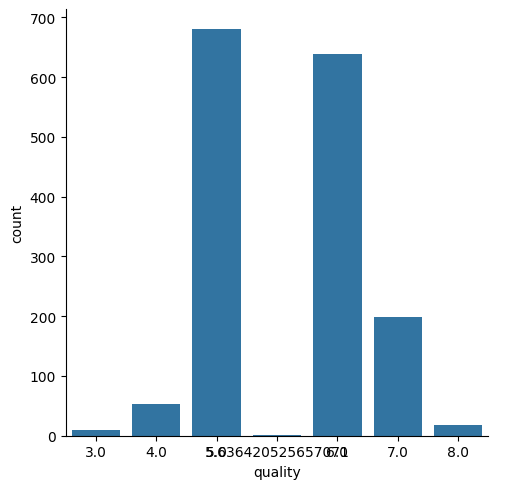

In [59]:
sns.catplot(x = 'quality', data = df , kind = 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

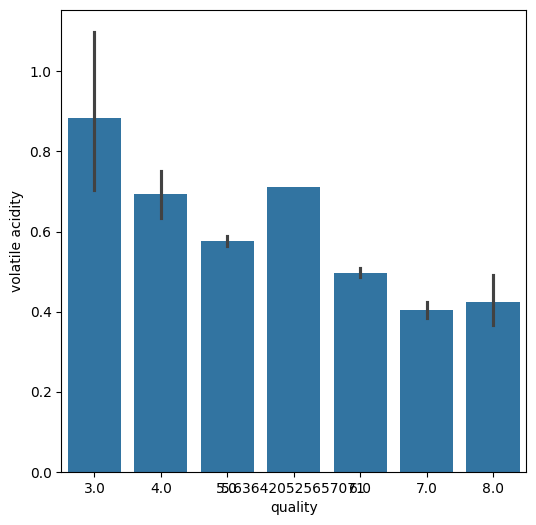

In [60]:
plot = plt.figure(figsize = (6,6))
sns.barplot(x = 'quality',y = 'volatile acidity' , data = df)

<Axes: xlabel='quality', ylabel='citric acid'>

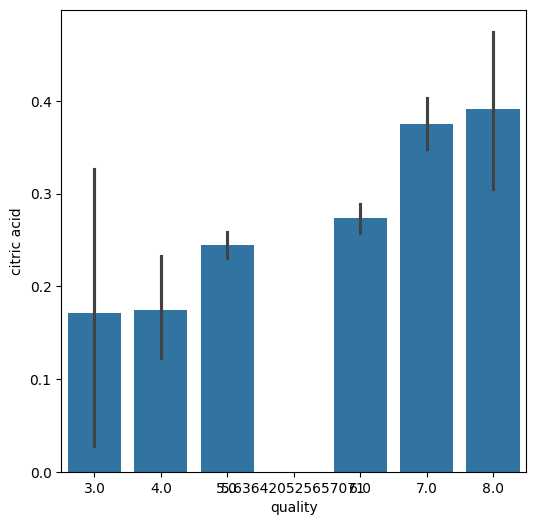

In [61]:
plot = plt.figure(figsize = (6,6))
sns.barplot(x = 'quality',y = 'citric acid' , data = df)

In [62]:
correlation = df.corr()

<Axes: >

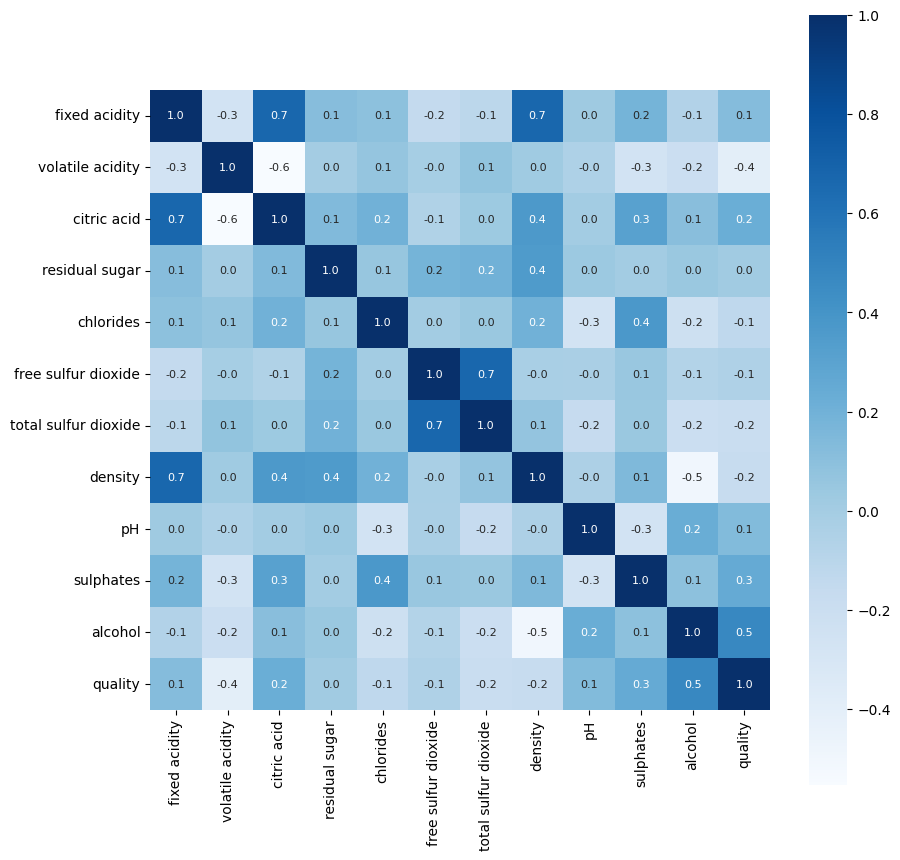

In [63]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation , cbar = True , square=True , fmt = '.1f' , annot = True , annot_kws={'size':8} , cmap = 'Blues')

In [64]:
X = df.drop('quality', axis = 1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [65]:
Y = df['quality'].apply(lambda y_value : 1 if y_value >= 7 else 0)

In [66]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [67]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y , test_size=0.2 , random_state=3)

In [68]:
print(Y.shape , Y_train.shape , Y_test.shape)

(1599,) (1279,) (320,)


In [69]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [70]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction , Y_test)

In [71]:
print('Accuracy:' , test_data_accuracy)

Accuracy: 0.925


In [72]:
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print('Quality of the wine: ', prediction[0])

if (prediction[0] == 1):
    print('The wine is considered good.')
else: 
    print('The wine is considered bad.')   


Quality of the wine:  1
The wine is considered good.


c:\Users\Sarthak Garg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [73]:
input_data = (7.5,0.050,0.36,6.1,0.071,17.0,46.433041,0.9978,3.35,0.80,10.5)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print('Quality of the wine: ', prediction[0])

if (prediction[0] == 1):
    print('The wine is considered good.')
else: 
    print('The wine is considered bad.')   


Quality of the wine:  0
The wine is considered bad.


c:\Users\Sarthak Garg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
